Bukti presensi

Diabaikan

In [ ]:
from sympy import *

Apakah perbedaan True/False dengan true/false? jelaskan kapan penggunaannya, dan berikan contoh dalam bentuk code

`True/False` adalah nilai boolean milik python, sedangkan `true/false` adalah nilai boolean milik sympy.

`true/false` digunakan ketika kita ingin melakukan operasi logika matematika dengan sympy.

`True/False` kita gunakan untuk operasi boolean pada syntax python, tanpa perlu mengimport sympy.

In [ ]:
True

True

In [ ]:
False

False

In [ ]:
true

True

In [ ]:
false

False

In [ ]:
x = And(true, false)
x

False

In [ ]:
x = True and False
x

False

Notasi apakah yang digunakan untuk NOT pada operasi bool di Python

not bool, not(bool), Not(bool)

Catatan: untuk menggunakan `Not(bool)` harus import sympy

In [ ]:
b = False
not b

True

In [ ]:
b = False
not(b)

True

In [ ]:
b = false
Not(b)

True

Tambahan

Operasi ~ (Bitwise NOT)

In [ ]:
~3

-4

Yang sebenarnya terjadi:

Bilangan desimal diubah ke dalam bentuk biner, lalu dioperasikan NOT ke setiap bit, lalu dikonversi kembali ke desimal.

~3 menjadi -4:

3 = 0000000000000011

-4 = 1111111111111100

Dengan menggunakan Python, buktikan keabsahan argumen berikut
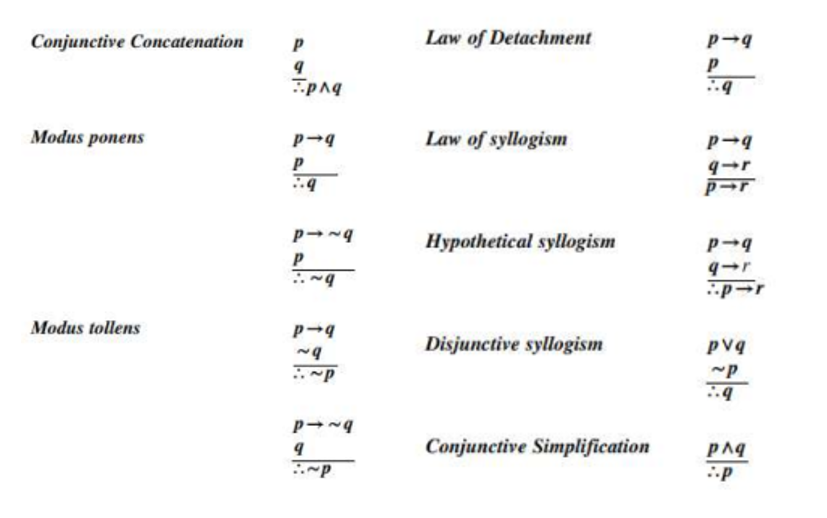

In [ ]:
import itertools

p = Symbol('p')
q = Symbol('q')
r = Symbol('r')


def evaluate(expr, symbols):
    symbols_amount = len(symbols)
    values = [false, true]
    permutations = list(itertools.product(values, repeat=symbols_amount))
    for bool_set in permutations:
        subs_parameter = {}
        for i in range(0, symbols_amount):
            subs_parameter[symbols[i]] = bool_set[i]
        print(str(subs_parameter), end=" : ")
        print(expr.subs(subs_parameter))


def validity_check(expr1, symbols1, expr2, symbols2, expr3, symbols3):
    print(expr1)
    evaluate(expr1, symbols1)
    print("")

    print(expr2)
    evaluate(expr2, symbols2)
    print("")

    and_expr1_expr2 = And(expr1, expr2)
    print(and_expr1_expr2)
    and_symbols = list((set(symbols1) - set(symbols2))) + list(symbols2)
    evaluate(and_expr1_expr2, and_symbols)
    print("")

    print(expr3)
    evaluate(expr3, symbols3)
    print("")

    final_check = Implies(and_expr1_expr2, expr3)
    print("Premis 1 ^ Premis 2 -> Konklusi")
    final_check_symbols = list((set(and_symbols) - set(symbols3))) + list(symbols3)
    evaluate(final_check, final_check_symbols)


**Conjunctive Concatenation**

In [ ]:
expr1 = p
expr2 = q
expr3 = And(p, q)
validity_check(expr1, [p], expr2, [q], expr3, [p, q])

p
{p: False} : False
{p: True} : True

q
{q: False} : False
{q: True} : True

p & q
{p: False, q: False} : False
{p: False, q: True} : False
{p: True, q: False} : False
{p: True, q: True} : True

p & q
{p: False, q: False} : False
{p: False, q: True} : False
{p: True, q: False} : False
{p: True, q: True} : True

Premis 1 ^ Premis 2 -> Konklusi
{p: False, q: False} : True
{p: False, q: True} : True
{p: True, q: False} : True
{p: True, q: True} : True


Karena tautologi, maka

$p$\
$q$\
$\overline{\therefore p\wedge q}$

dapat dikatakan absah.

**Modus Ponens**

In [ ]:
expr1 = Implies(p, q)
expr2 = p
expr3 = q
validity_check(expr1, [p, q], expr2, [p], expr3, [q])

Implies(p, q)
{p: False, q: False} : True
{p: False, q: True} : True
{p: True, q: False} : False
{p: True, q: True} : True

p
{p: False} : False
{p: True} : True

p & (Implies(p, q))
{q: False, p: False} : False
{q: False, p: True} : False
{q: True, p: False} : False
{q: True, p: True} : True

q
{q: False} : False
{q: True} : True

Premis 1 ^ Premis 2 -> Konklusi
{p: False, q: False} : True
{p: False, q: True} : True
{p: True, q: False} : True
{p: True, q: True} : True


Karena tautologi, maka

$p\rightarrow q$\
$p$\
$\overline{\therefore q}$

dapat dikatakan absah.

In [ ]:
expr1 = Implies(p, Not(q))
expr2 = p
expr3 = Not(q)
validity_check(expr1, [p, q], expr2, [p], expr3, [q])

Implies(p, ~q)
{p: False, q: False} : True
{p: False, q: True} : True
{p: True, q: False} : True
{p: True, q: True} : False

p
{p: False} : False
{p: True} : True

p & (Implies(p, ~q))
{q: False, p: False} : False
{q: False, p: True} : True
{q: True, p: False} : False
{q: True, p: True} : False

~q
{q: False} : True
{q: True} : False

Premis 1 ^ Premis 2 -> Konklusi
{p: False, q: False} : True
{p: False, q: True} : True
{p: True, q: False} : True
{p: True, q: True} : True


Karena tautologi, maka

$p\rightarrow \sim q$\
$p$\
$\overline{\therefore \sim q}$

dapat dikatakan absah.

**Modus Tollens**

In [ ]:
expr1 = Implies(p, q)
expr2 = Not(q)
expr3 = Not(p)
validity_check(expr1, [p, q], expr2, [q], expr3, [p])

Implies(p, q)
{p: False, q: False} : True
{p: False, q: True} : True
{p: True, q: False} : False
{p: True, q: True} : True

~q
{q: False} : True
{q: True} : False

~q & (Implies(p, q))
{p: False, q: False} : True
{p: False, q: True} : False
{p: True, q: False} : False
{p: True, q: True} : False

~p
{p: False} : True
{p: True} : False

Premis 1 ^ Premis 2 -> Konklusi
{q: False, p: False} : True
{q: False, p: True} : True
{q: True, p: False} : True
{q: True, p: True} : True


Karena tautologi, maka

$p\rightarrow q$\
$\sim q$\
$\overline{\therefore \sim p}$

dapat dikatakan absah.

In [ ]:
expr1 = Implies(p, Not(q))
expr2 = q
expr3 = Not(p)
validity_check(expr1, [p, q], expr2, [q], expr3, [p])

Implies(p, ~q)
{p: False, q: False} : True
{p: False, q: True} : True
{p: True, q: False} : True
{p: True, q: True} : False

q
{q: False} : False
{q: True} : True

q & (Implies(p, ~q))
{p: False, q: False} : False
{p: False, q: True} : True
{p: True, q: False} : False
{p: True, q: True} : False

~p
{p: False} : True
{p: True} : False

Premis 1 ^ Premis 2 -> Konklusi
{q: False, p: False} : True
{q: False, p: True} : True
{q: True, p: False} : True
{q: True, p: True} : True


Karena tautologi, maka

$p\rightarrow \sim q$\
$q$\
$\overline{\therefore \sim p}$

dapat dikatakan absah.

**Law of Detachment**

In [ ]:
expr1 = Implies(p, q)
expr2 = p
expr3 = q
validity_check(expr1, [p, q], expr2, [p], expr3, [q])

Implies(p, q)
{p: False, q: False} : True
{p: False, q: True} : True
{p: True, q: False} : False
{p: True, q: True} : True

p
{p: False} : False
{p: True} : True

p & (Implies(p, q))
{q: False, p: False} : False
{q: False, p: True} : False
{q: True, p: False} : False
{q: True, p: True} : True

q
{q: False} : False
{q: True} : True

Premis 1 ^ Premis 2 -> Konklusi
{p: False, q: False} : True
{p: False, q: True} : True
{p: True, q: False} : True
{p: True, q: True} : True


Karena tautologi, maka

$p\rightarrow q$\
$p$\
$\overline{\therefore q}$

dapat dikatakan absah.

**Law of Syllogism**

In [ ]:
expr1 = Implies(p, q)
expr2 = Implies(q, r)
expr3 = Implies(p, r)
validity_check(expr1, [p, q], expr2, [q, r], expr3, [p, r])

Implies(p, q)
{p: False, q: False} : True
{p: False, q: True} : True
{p: True, q: False} : False
{p: True, q: True} : True

Implies(q, r)
{q: False, r: False} : True
{q: False, r: True} : True
{q: True, r: False} : False
{q: True, r: True} : True

(Implies(p, q)) & (Implies(q, r))
{p: False, q: False, r: False} : True
{p: False, q: False, r: True} : True
{p: False, q: True, r: False} : False
{p: False, q: True, r: True} : True
{p: True, q: False, r: False} : False
{p: True, q: False, r: True} : False
{p: True, q: True, r: False} : False
{p: True, q: True, r: True} : True

Implies(p, r)
{p: False, r: False} : True
{p: False, r: True} : True
{p: True, r: False} : False
{p: True, r: True} : True

Premis 1 ^ Premis 2 -> Konklusi
{q: False, p: False, r: False} : True
{q: False, p: False, r: True} : True
{q: False, p: True, r: False} : True
{q: False, p: True, r: True} : True
{q: True, p: False, r: False} : True
{q: True, p: False, r: True} : True
{q: True, p: True, r: False} : True
{q: True

Karena tautologi, maka

$p\rightarrow q$\
$q \rightarrow r$\
$\overline{p \rightarrow r}$

dapat dikatakan absah.

**Hypotetical Syllogism**

In [ ]:
expr1 = Implies(p, q)
expr2 = Implies(q, r)
expr3 = Implies(p, r)
validity_check(expr1, [p, q], expr2, [q, r], expr3, [p, r])

Implies(p, q)
{p: False, q: False} : True
{p: False, q: True} : True
{p: True, q: False} : False
{p: True, q: True} : True

Implies(q, r)
{q: False, r: False} : True
{q: False, r: True} : True
{q: True, r: False} : False
{q: True, r: True} : True

(Implies(p, q)) & (Implies(q, r))
{p: False, q: False, r: False} : True
{p: False, q: False, r: True} : True
{p: False, q: True, r: False} : False
{p: False, q: True, r: True} : True
{p: True, q: False, r: False} : False
{p: True, q: False, r: True} : False
{p: True, q: True, r: False} : False
{p: True, q: True, r: True} : True

Implies(p, r)
{p: False, r: False} : True
{p: False, r: True} : True
{p: True, r: False} : False
{p: True, r: True} : True

Premis 1 ^ Premis 2 -> Konklusi
{q: False, p: False, r: False} : True
{q: False, p: False, r: True} : True
{q: False, p: True, r: False} : True
{q: False, p: True, r: True} : True
{q: True, p: False, r: False} : True
{q: True, p: False, r: True} : True
{q: True, p: True, r: False} : True
{q: True

Karena tautologi, maka

$p\rightarrow q$\
$q \rightarrow r$\
$\overline{\therefore p \rightarrow r}$

dapat dikatakan absah.

**Disjunctive Syllogism**

In [ ]:
expr1 = Or(p, q)
expr2 = Not(p)
expr3 = q
validity_check(expr1, [p, q], expr2, [p], expr3, [q])

p | q
{p: False, q: False} : False
{p: False, q: True} : True
{p: True, q: False} : True
{p: True, q: True} : True

~p
{p: False} : True
{p: True} : False

~p & (p | q)
{q: False, p: False} : False
{q: False, p: True} : False
{q: True, p: False} : True
{q: True, p: True} : False

q
{q: False} : False
{q: True} : True

Premis 1 ^ Premis 2 -> Konklusi
{p: False, q: False} : True
{p: False, q: True} : True
{p: True, q: False} : True
{p: True, q: True} : True


Karena tautologi, maka

$p\vee q$\
$\sim p$\
$\overline{\therefore q}$

dapat dikatakan absah.

**Conjunctive Simplification**

In [ ]:
expr1 = And(p, q)
expr3 = p
valid_check = Implies(expr1, expr3)
print(expr1)
evaluate(expr1, [p, q])
print("")
print(expr3)
evaluate(expr3, [p])
print("")
print(valid_check)
evaluate(valid_check, [p, q])

p & q
{p: False, q: False} : False
{p: False, q: True} : False
{p: True, q: False} : False
{p: True, q: True} : True

p
{p: False} : False
{p: True} : True

Implies(p & q, p)
{p: False, q: False} : True
{p: False, q: True} : True
{p: True, q: False} : True
{p: True, q: True} : True


Karena tautologi, maka

$p\wedge q$\
$\overline{\therefore p}$

dapat dikatakan absah.